In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

## Normally Distributed Noise

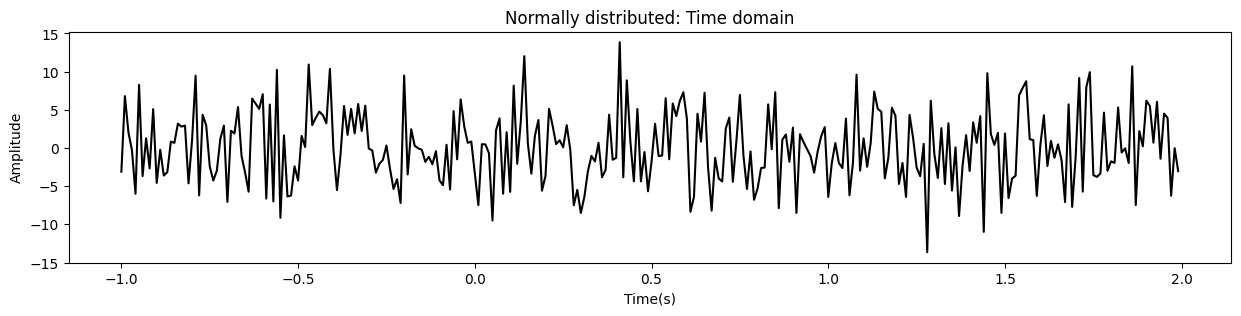

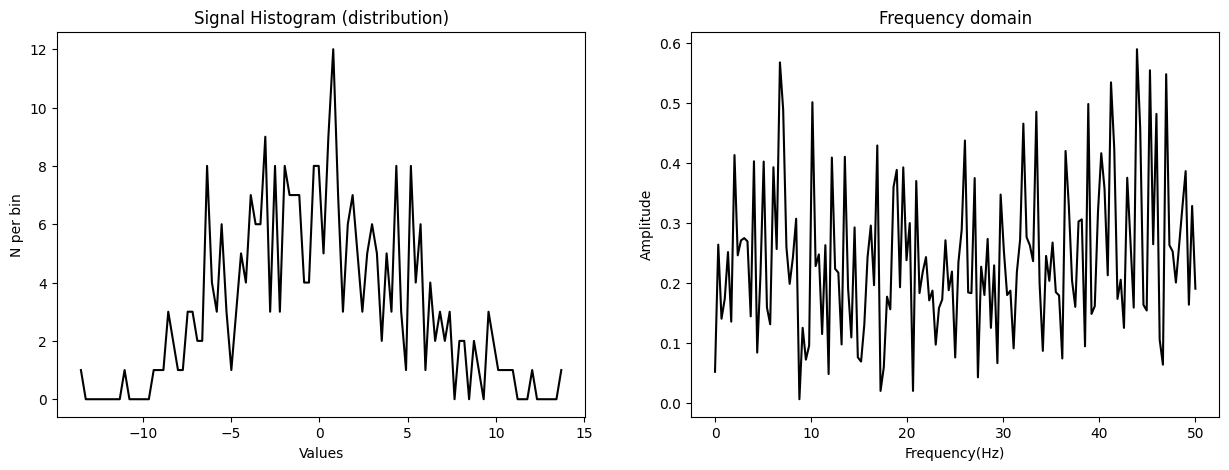

In [32]:
srate = 100
time = np.arange(-1,2,1/srate)
pnts = len(time)

hz = np.linspace(0,srate/2,int(len(time)/2)-1)

stretch = 5
shift = 0

noise = stretch*np.random.randn(pnts) + shift

plt.figure(figsize=(15, 3))

plt.plot(time,noise,"k")
plt.title("Normally distributed: Time domain")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(121)
y,x = np.histogram(noise,bins=100)
x = (x[1:] + x[:-1])/2
plt.plot(x,y,"k")
plt.title("Signal Histogram (distribution)")
plt.xlabel("Values")
plt.ylabel("N per bin")


plt.subplot(122)
amp = np.abs(scipy.fft.fft(noise)/pnts)
plt.plot(hz,amp[:len(hz)],"k")
plt.title("Frequency domain")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")


plt.show()

## Pink Noise

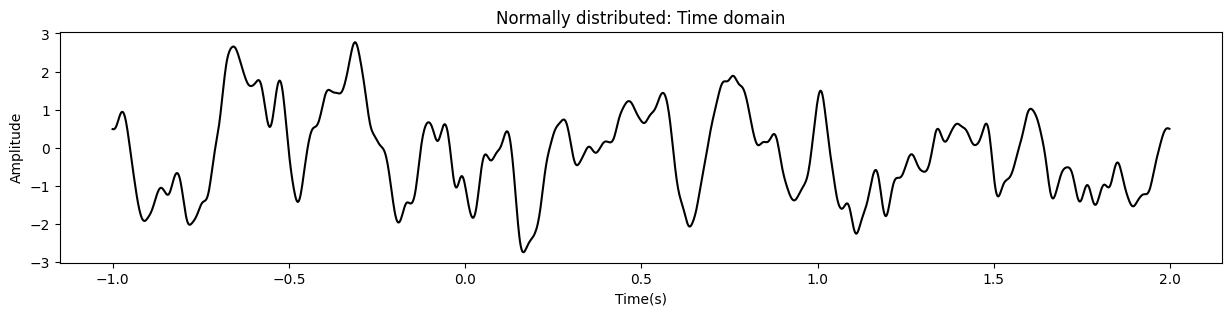

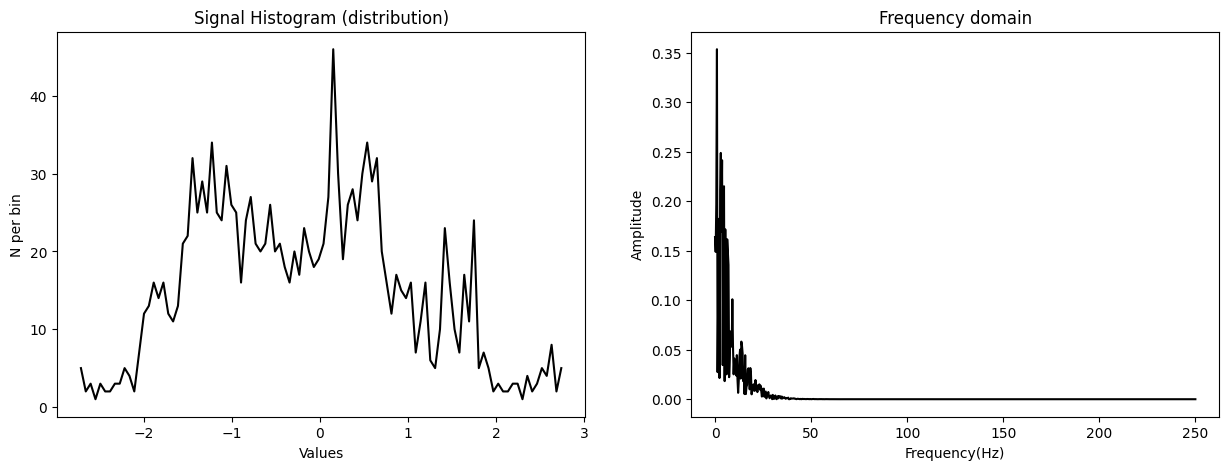

In [58]:
srate = 500
time = np.arange(-1,2,1/srate)
pnts = len(time)

hz = np.linspace(0,srate/2,int(len(time)/2)-1)

expdecay = 20
as_ = np.random.rand(int(pnts)) * np.exp(-(np.arange(int(pnts))/expdecay))

fc = as_ * np.exp(1j*2*np.pi*np.random.rand(len(as_)) )

noise = np.real(scipy.fft.ifft(fc)) *pnts

plt.figure(figsize=(15, 3))

plt.plot(time,noise,"k")
plt.title("Normally distributed: Time domain")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(121)
y,x = np.histogram(noise,bins=100)
x = (x[1:] + x[:-1])/2
plt.plot(x,y,"k")
plt.title("Signal Histogram (distribution)")
plt.xlabel("Values")
plt.ylabel("N per bin")


plt.subplot(122)
amp = np.abs(scipy.fft.fft(noise)/pnts)
plt.plot(hz,amp[:len(hz)],"k")
plt.title("Frequency domain")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")


plt.show()

## Sine Waves

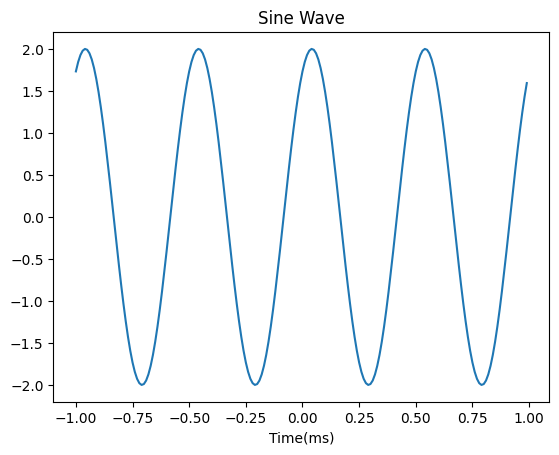

In [63]:
freq = 2
srate = 100
time = np.arange(-1,1,1/srate)
amp = 2
phas = np.pi/3

sinewave = amp * np.sin(2*np.pi*freq*time + phas)

plt.plot(time,sinewave)
plt.title("Sine Wave")
plt.xlabel("Time(ms)")
plt.show()

## Gaussian

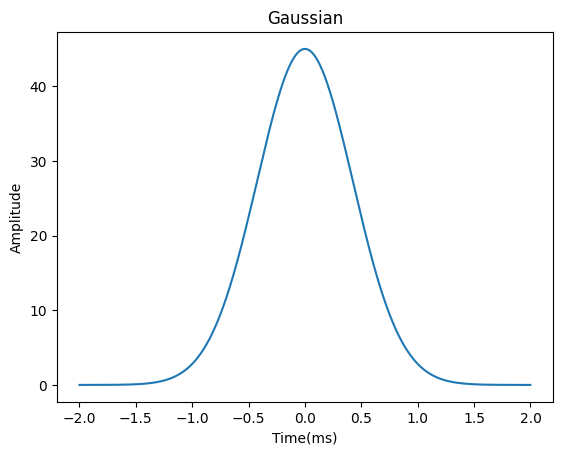

In [83]:
srate = 1000
time = np.arange(-2,2,1/srate)
ptime = 0
amp = 45
fwhm = 1

gau = amp * np.exp(-4*np.log(2)*(time-ptime)**2 /fwhm**2)

plt.plot(time,gau)
plt.title("Gaussian")
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.show()

## Chirps Data

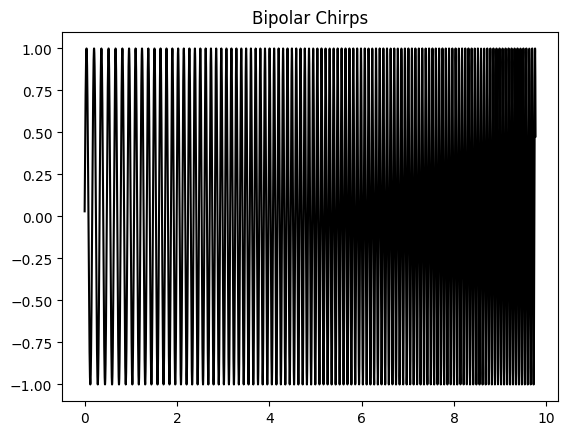

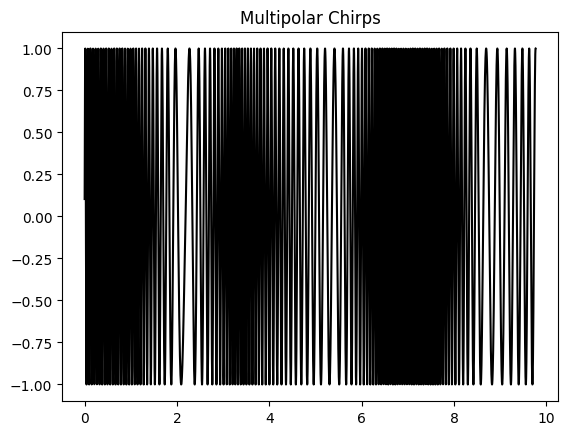

In [92]:
pnts = 10000
srate = 1024
time = np.arange(0,pnts) /srate

freqmod = np.linspace(5,15,pnts)

signal = np.sin(2*np.pi*(time + np.cumsum(freqmod)/srate))

plt.plot(time, signal,"k")
plt.title("Bipolar Chirps")
plt.show()

k = 10
freqmod = 20 * np.interp(np.linspace(0, 1, pnts), np.linspace(0, 1, k), np.random.rand(k))
signal = np.sin(2*np.pi*(time + np.cumsum(freqmod)/srate))

plt.plot(time, signal,"k")
plt.title("Multipolar Chirps")
plt.show()

## Ongoing Nonstationary

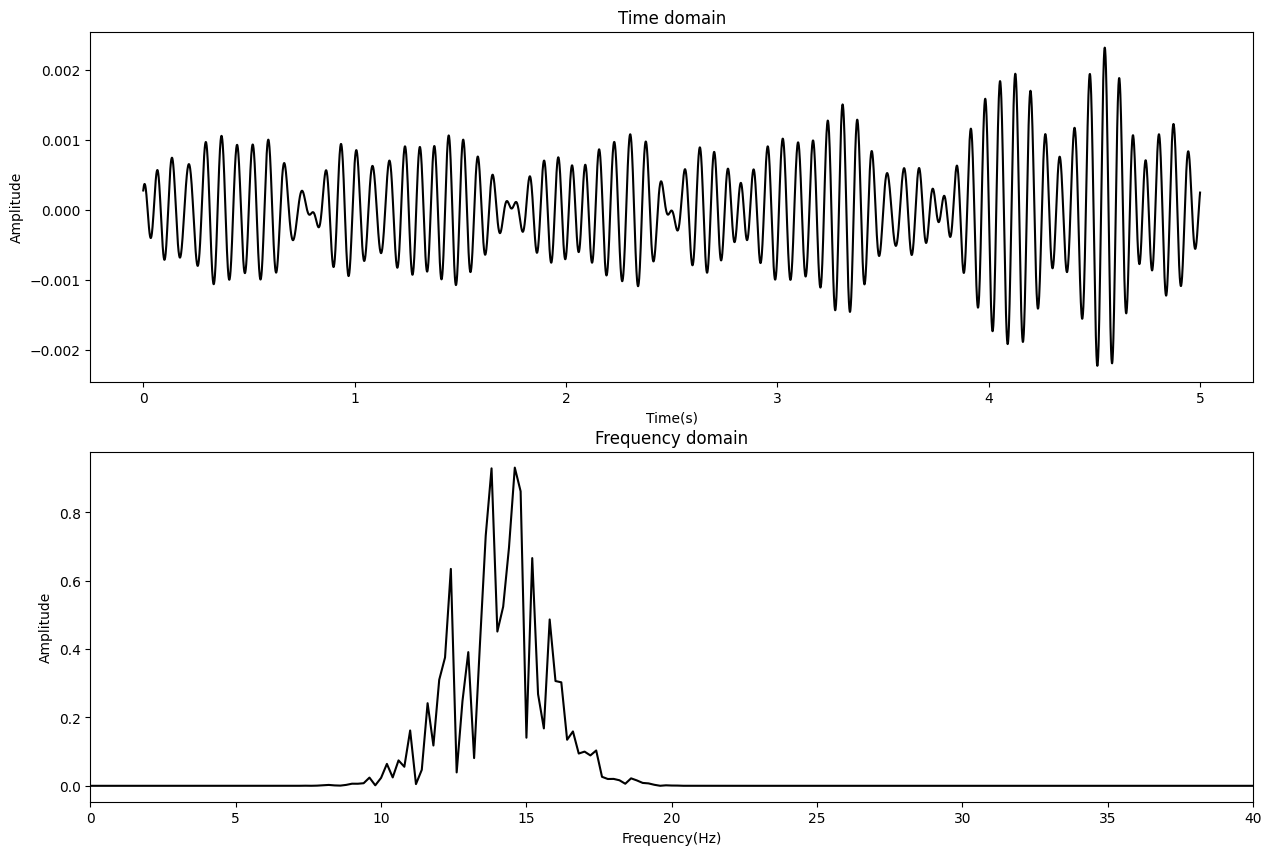

In [124]:
srate  = 1000
time = np.arange(0,5,1/srate)
pnts = len(time)

ptime = 14
fwhm = 4

hz = np.linspace(0,srate,pnts)

s = fwhm * (2*np.pi-1) /(4*np.pi)
x = hz - ptime
fg = np.exp(-0.5*(x/s)**2)

fc = np.random.rand(pnts) * np.exp(1j*2*np.pi*np.random.rand(pnts))

fc = fc * fg

signal = 2*np.real(scipy.fft.ifft(fc))

plt.figure(figsize=(15, 10))

plt.subplot(211)
plt.plot(time,signal,"k")
plt.title("Time domain")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")


plt.subplot(212)
amp = np.abs(scipy.fft.fft(signal))
plt.plot(hz,amp[:len(hz)],"k")
plt.title("Frequency domain")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.xlim([0,40])


plt.show()

## Transient Oscillation

(0.0, 4.0)

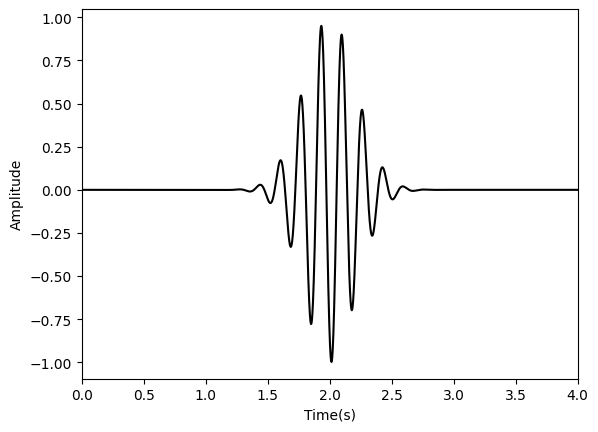

In [130]:
pnts = 3000
srate = 1000
time = np.arange(0,srate/2,1/srate)

ptime = 2
fwhm = .5

sinefreq = 6

gaus = np.exp(-4*np.log(2)*(time-ptime)**2/fwhm**2)

cosw = np.cos(2*np.pi*sinefreq*time + 2*np.pi*np.random.rand())

signal = cosw * gaus

plt.plot(time,signal,"k")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.xlim([0,4])
